In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../nd_fixed_beta/nd_fixed_results.csv')
df.head()

,n,p_n,p,contamination_level,ctam_sigma,ctam_mu,cook_cutoff,robust_m_est_bias,robust_m_est_variance,robust_m_est_mse,...,ols_est_variance,ols_est_mse,ols_diag_est_bias,ols_diag_est_variance,ols_diag_est_mse,ols_mspe,robust_m_mspe,robust_mm_mspe,robust_s_mspe,ols_diag_mspe
0,50,0.1,5,0.0,1,0,4,0.000036,0.026647,0.026576,...,0.024747,0.024668,0.000151,0.032995,0.033015,1.174025,1.185175,1.204524,1.569046,1.224103
1,50,0.1,5,0.1,1,0,4,0.004582,0.030275,0.034736,...,0.035695,0.045032,0.001710,0.031478,0.033062,1.239452,1.186964,1.182178,1.502784,1.182306
2,50,0.1,5,0.2,1,0,4,0.016193,0.038116,0.054157,...,0.042896,0.069836,0.007489,0.038866,0.046200,1.378912,1.295318,1.276396,1.646184,1.258505
3,50,0.1,5,0.3,1,0,4,0.032512,0.042746,0.075087,...,0.044985,0.094245,0.017545,0.048450,0.065801,1.532945,1.433429,1.418031,1.642637,1.384184
4,50,0.1,5,0.4,1,0,4,0.066100,0.052318,0.118209,...,0.052078,0.139222,0.040909,0.057252,0.097933,1.745134,1.639742,1.617548,1.796064,1.534246


In [3]:
df.columns

Index(['n', 'p_n', 'p', 'contamination_level', 'ctam_sigma', 'ctam_mu',
       'cook_cutoff', 'robust_m_est_bias', 'robust_m_est_variance',
       'robust_m_est_mse', 'robust_mm_est_bias', 'robust_mm_est_variance',
       'robust_mm_est_mse', 'robust_s_est_bias', 'robust_s_est_variance',
       'robust_s_est_mse', 'ols_est_bias', 'ols_est_variance', 'ols_est_mse',
       'ols_diag_est_bias', 'ols_diag_est_variance', 'ols_diag_est_mse',
       'ols_mspe', 'robust_m_mspe', 'robust_mm_mspe', 'robust_s_mspe',
       'ols_diag_mspe'],
      dtype='object')

In [4]:
feature_columns = ['n', 'p_n', 'p', 'contamination_level', 'ctam_sigma', 'ctam_mu']
mpse_columns = ['ols_mspe', 'robust_m_mspe', 'robust_mm_mspe', 'robust_s_mspe', 'ols_diag_mspe']
bias_columns = ['ols_est_bias', 'robust_m_est_bias', 'robust_mm_est_bias', 'robust_s_est_bias', 'ols_diag_est_bias']
variance_columns = ['ols_est_variance', 'robust_m_est_variance', 'robust_mm_est_variance', 'robust_s_est_variance', 'ols_diag_est_variance']
mse_columns = ['ols_est_mse', 'robust_m_est_mse', 'robust_mm_est_mse', 'robust_s_est_mse', 'ols_diag_est_mse']

In [5]:
df[feature_columns].describe()

,n,p_n,p,contamination_level,ctam_sigma,ctam_mu
count,120.000000,120.000000,120.0000,120.000000,120.0,120.0
mean,187.500000,0.500000,93.7500,0.250000,1.0,0.0
std,134.609613,0.284029,93.8917,0.171499,0.0,0.0
min,50.000000,0.100000,5.0000,0.000000,1.0,0.0
25%,87.500000,0.300000,28.7500,0.100000,1.0,0.0
50%,150.000000,0.500000,55.0000,0.250000,1.0,0.0
75%,250.000000,0.700000,125.0000,0.400000,1.0,0.0
max,400.000000,0.900000,360.0000,0.500000,1.0,0.0


In [45]:
df_mse = df[feature_columns + mse_columns]
df_mse = df_mse.melt(id_vars=feature_columns, value_vars=mse_columns, var_name='method', value_name='mse')
df_mse['method'] = df_mse['method'].str.replace('_est_mse', '')
df_mse.head()

,n,p_n,p,contamination_level,ctam_sigma,ctam_mu,method,mse
0,50,0.1,5,0.0,1,0,ols,0.024668
1,50,0.1,5,0.1,1,0,ols,0.045032
2,50,0.1,5,0.2,1,0,ols,0.069836
3,50,0.1,5,0.3,1,0,ols,0.094245
4,50,0.1,5,0.4,1,0,ols,0.139222


In [46]:
df_mse = df_mse[(df_mse['n'] == 200)]

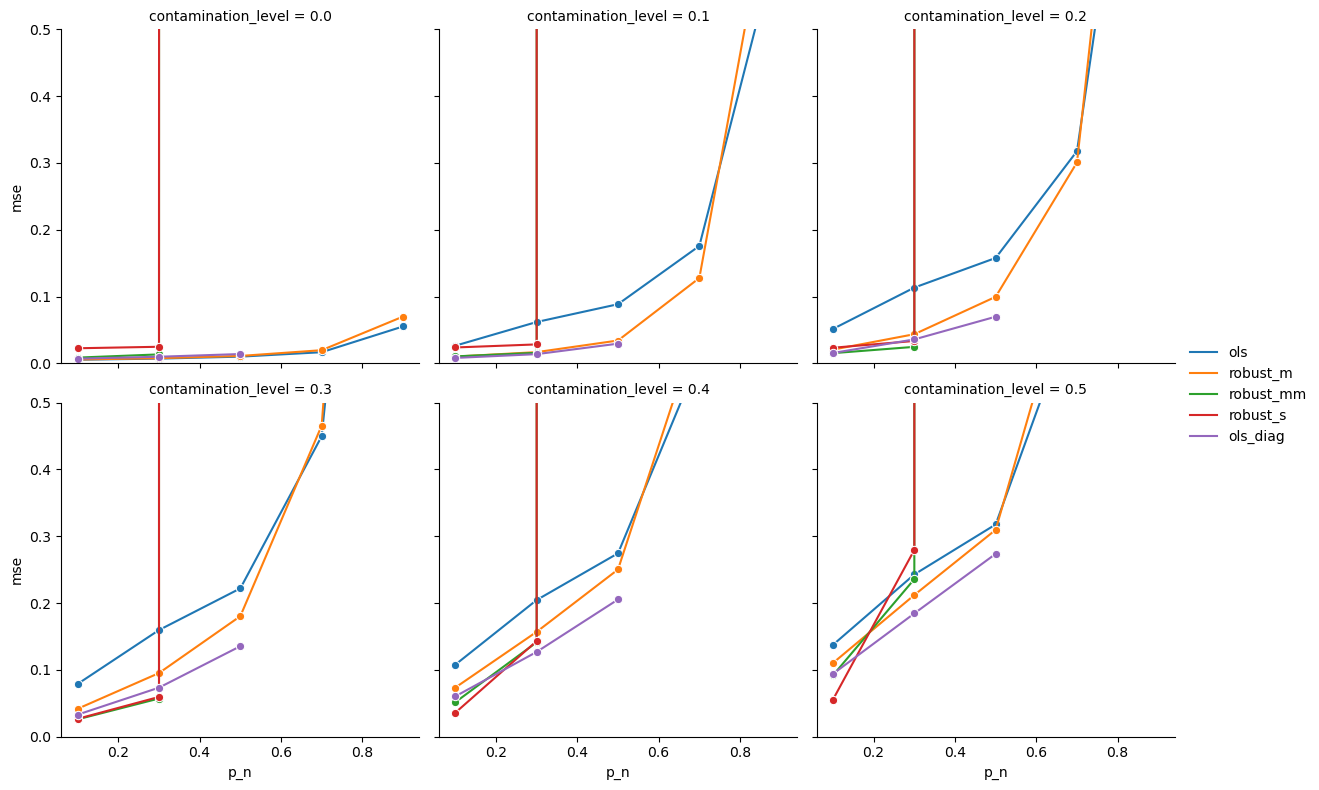

In [50]:
g = sns.FacetGrid(df_mse, col='contamination_level', col_wrap=3, height=4, aspect=1)
g.map(sns.lineplot, 'p_n', 'mse', 'method', marker='o')
g.add_legend()
plt.ylim(0, 0.5)
plt.show()

In [52]:
df_mspes = df[feature_columns + mpse_columns]
df_mspes = df_mspes.melt(id_vars=feature_columns, value_vars=mpse_columns, var_name='method', value_name='mpse')
df_mspes['method'] = df_mspes['method'].str.replace('_mspe', '')
df_mspes = df_mspes[(df_mspes['n'] == 200)]

df_mspes.head()

,n,p_n,p,contamination_level,ctam_sigma,ctam_mu,method,mpse
60,200,0.1,20,0.0,1,0,ols,1.113244
61,200,0.1,20,0.1,1,0,ols,1.548373
62,200,0.1,20,0.2,1,0,ols,2.050180
63,200,0.1,20,0.3,1,0,ols,2.596812
64,200,0.1,20,0.4,1,0,ols,3.256135


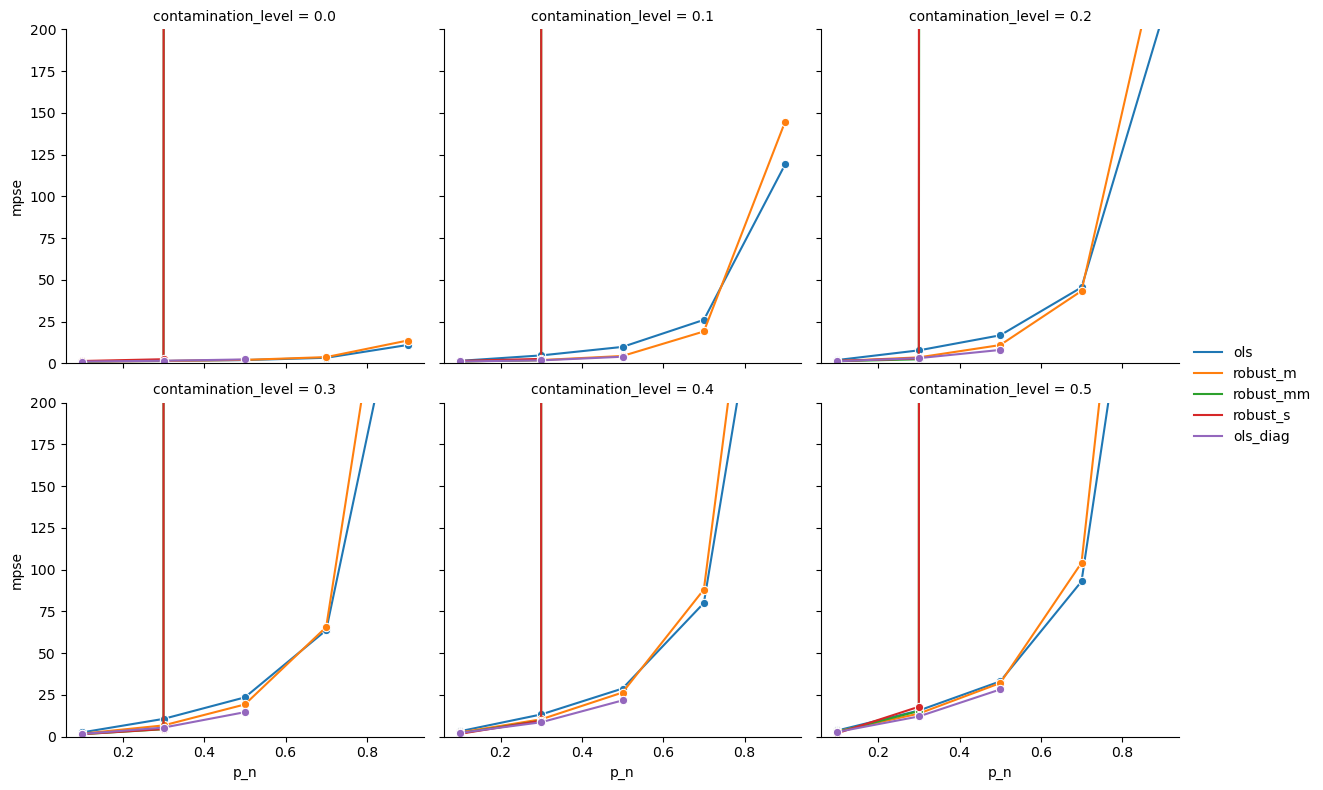

In [57]:
g = sns.FacetGrid(df_mspes, col='contamination_level', col_wrap=3, height=4, aspect=1)
g.map(sns.lineplot, 'p_n', 'mpse', 'method', marker='o')
g.add_legend()
plt.ylim(0, 200)
plt.show()